# Pymaceuticals Inc.
---

### Analysis

- I was unable to generate the lst two graphs, but for the graphs that I was able to generate you can tell the population was split evenly between males and females mice. When it comes to the timepoints there is only Capomulin and Ramicane with slighty higher timepoints and Propriva with slighty lower timepoints. Another thing we can observe is Capomulin and Ramicane have lower final tumor volume compared to infubinol and Ceftamin. Capomulin showed tumor volume go down as timepoints went on.
 

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_df = pd.merge(study_results, mouse_metadata,  how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [59]:
# Checking the number of mice.
mice_count = study_results["Mouse ID"].nunique()
mice_count

249

In [60]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_unique_id = complete_df.loc[complete_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_unique_id

array(['g989'], dtype=object)

In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_unique_df = complete_df.loc[complete_df["Mouse ID"] == "g989", :]
mice_unique_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = complete_df[complete_df["Mouse ID"].isin(mice_unique_id)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [63]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
drug_stat = pd.DataFrame({"Mean Tumor Volume": mean,
                          "Median Tumor Volume": median,
                          "Tumor Volume Variance": var,
                          "Tumor Volume Std. Dev.": std,
                          "Tumor Volume Std. Err.": sem})

drug_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [65]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_drug_stat = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
clean_drug_stat

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [66]:
#Retrieve and store the data for the upcoming charts.
total_drug_regimen = clean_df["Drug Regimen"].value_counts()

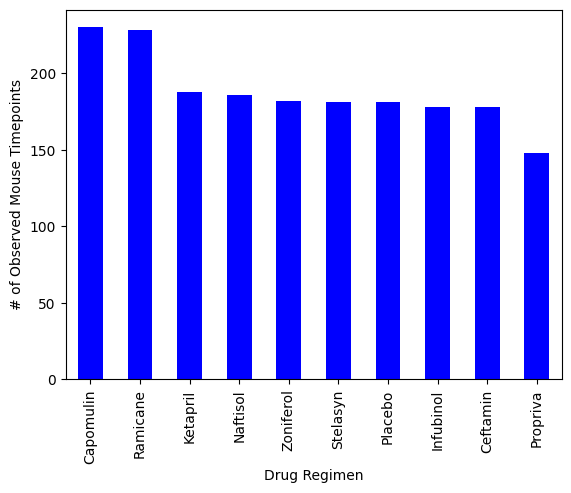

In [67]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
panda_plot = total_drug_regimen.plot.bar(color="blue")

#Set Labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

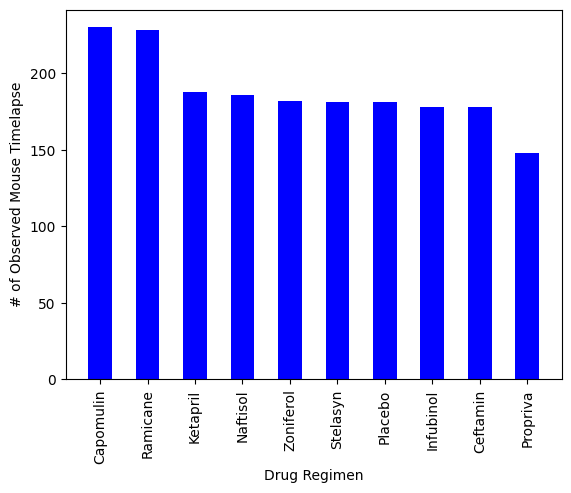

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = total_drug_regimen.index.values
y_axis = total_drug_regimen.values

plt.bar(x_axis, y_axis, color="blue", alpha=1, width=0.5, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timelapse")
plt.xticks(rotation="vertical")

plt.show()

In [69]:
#Retrieve and store the data for the upcoming charts.
gender_dist = clean_df["Sex"].value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

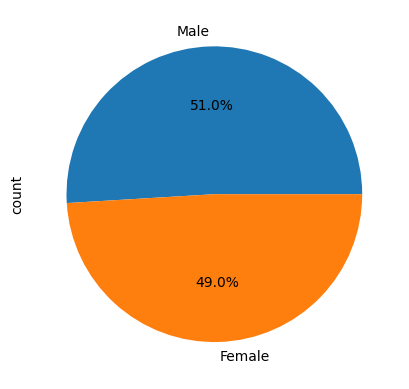

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_dist.plot.pie(autopct= "%1.1f%%")

plt.show

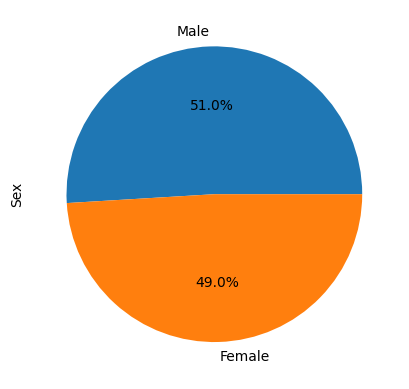

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [50, 50]
plot = gender_dist.plot.pie(autopct="%1.1f%%")

plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tm = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
last_tm_df = pd.DataFrame(last_tm) # turned it into a dataframe for merging
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# merging "on" Mouse ID and Timepoint, "how" on RIGHT so that it only records the MAX timepoints
last_df = pd.merge(clean_df, last_tm_df, on=('Mouse ID', 'Timepoint'), how='right')
last_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [73]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []



    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_cef.append(row['Tumor Volume (mm3)'])
    
    # add subset 
#created a data frame with the tumor data of the drugs listed.
drug_df = pd.DataFrame({"Capomulin": tumor_cap,
                       treatments[1]: tumor_ram,
                       treatments[2]: tumor_inf,
                       treatments[3]: tumor_cef
                       })
    
    # Determine outliers using upper and lower bounds
drug_df_max = drug_df.max()
drug_df_min = drug_df.min()



In [74]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quart_cap = drug_df[treatments[0]].quantile([.25, .5, .75])
low_cap = quart_cap[.25]
med_cap = quart_cap[.5]
up_cap = quart_cap[.75]
iqr_cap = up_cap-low_cap
lowb_cap = low_cap - (1.5*iqr_cap)
upb_cap = up_cap + (1.5*iqr_cap)
max_cap = drug_df[treatments[0]].max()
min_cap = drug_df[treatments[0]].min()

quart_ram = drug_df[treatments[1]].quantile([.25, .5, .75])
low_ram = quart_ram[.25]
med_ram = quart_ram[.5]
up_ram = quart_ram[.75]
iqr_ram = up_ram-low_ram
lowb_ram = low_ram - (1.5*iqr_ram)
upb_ram = up_ram + (1.5*iqr_ram)
max_ram = drug_df[treatments[1]].max()
min_ram = drug_df[treatments[1]].min()

quart_inf = drug_df[treatments[2]].quantile([.25, .5, .75])
low_inf = quart_inf[.25]
med_inf = quart_inf[.5]
up_inf = quart_inf[.75]
iqr_inf = up_inf-low_inf
lowb_inf = low_inf - (1.5*iqr_inf)
upb_inf = up_inf + (1.5*iqr_inf)
max_inf = drug_df[treatments[2]].max()
min_inf = drug_df[treatments[2]].min()

quart_cef = drug_df[treatments[3]].quantile([.25, .5, .75])
low_cef = quart_cef[.25]
med_cef = quart_cef[.5]
up_cef = quart_cef[.75]
iqr_cef = up_cef-low_cef
lowb_cef = low_cef - (1.5*iqr_cef)
upb_cef = up_cef + (1.5*iqr_cef)
max_cef = drug_df[treatments[3]].max()
min_cef = drug_df[treatments[3]].min()

outliers = pd.DataFrame({'Drug': treatments,
                         'Lower Quartile':[low_cap, low_ram, low_inf, low_cef],
                         'Upper Quartile':[up_cap, up_ram, up_inf, up_cef],
                         'IQR':[iqr_cap, iqr_ram, iqr_inf, iqr_cef],
                         'Median':[med_cap, med_ram, med_inf, med_cef],
                        'Upper Bound': [upb_cap, upb_ram, upb_inf, upb_cef],
                        'Lower Bound': [lowb_cap, lowb_ram, lowb_inf, lowb_cef],
                        'Max': [max_cap, max_ram, max_inf, max_cef],
                         'Min': [min_cap, min_ram, min_inf, min_cef]
                        })
outliers
outliers_group = outliers.groupby('Drug')
outliers_group.sum()

,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound,Max,Min
Drug,,,,,,,,
Capomulin,32.377357,40.159220,7.781863,38.125164,51.832015,20.704562,47.685963,23.343598
Ceftamin,48.722078,64.299830,15.577752,59.851956,87.666458,25.355450,68.923185,45.000000
Infubinol,54.048608,65.525743,11.477135,60.165180,82.741446,36.832905,72.226731,36.321346
Ramicane,31.560470,40.659006,9.098537,36.561652,54.306811,17.912664,45.220869,22.050126


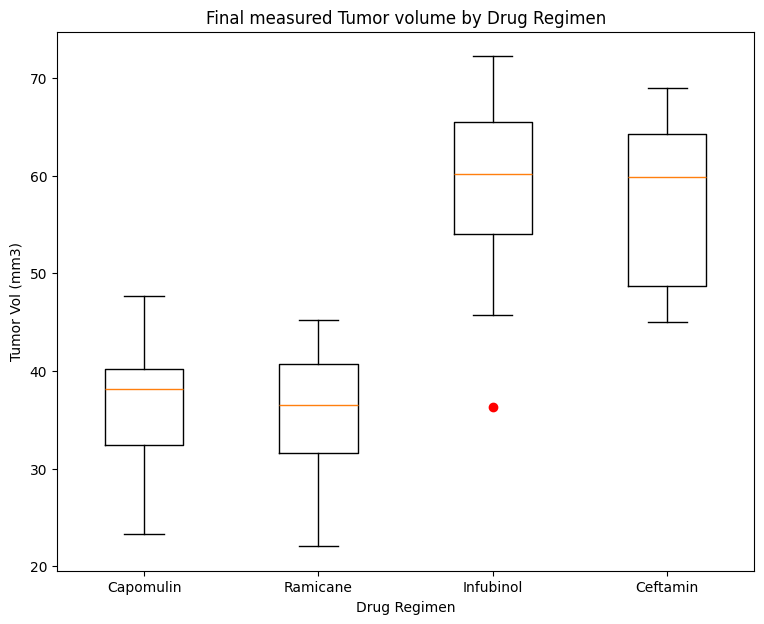

In [75]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = [drug_df[treatments[0]],
                drug_df[treatments[1]],
                drug_df[treatments[2]],
                drug_df[treatments[3]]
               ]

fig1, ax = plt.subplots(figsize=(9,7))
ax.set_ylabel('Tumor Vol (mm3)')

ax.boxplot(boxplot_list, 0, 'r')
plt.xticks([1,2,3,4], treatments)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

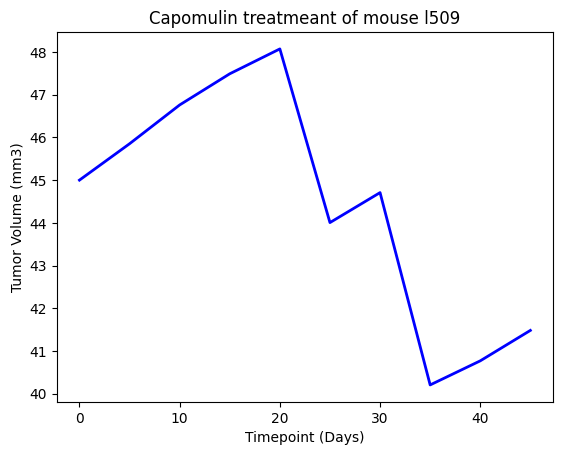

In [76]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
time_point = line_df["Timepoint"]
tumor_volume = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(time_point, tumor_volume, linewidth=2, color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')